In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [0]:

batch_size = 64
num_classes = 10
epochs = 50
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [17]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:

model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
                 
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 121s 2ms/step - loss: 1.9043 - acc: 0.3088 - val_loss: 1.9119 - val_acc: 0.3347
Epoch 2/50
50000/50000 [==============================] - 120s 2ms/step - loss: 1.5178 - acc: 0.4523 - val_loss: 1.5019 - val_acc: 0.4461
Epoch 3/50
50000/50000 [==============================] - 119s 2ms/step - loss: 1.3265 - acc: 0.5253 - val_loss: 1.2653 - val_acc: 0.5478
Epoch 4/50
50000/50000 [==============================] - 119s 2ms/step - loss: 1.2144 - acc: 0.5692 - val_loss: 1.3143 - val_acc: 0.5315
Epoch 5/50
50000/50000 [==============================] - 119s 2ms/step - loss: 1.1152 - acc: 0.6039 - val_loss: 1.1796 - val_acc: 0.5802
Epoch 6/50
50000/50000 [==============================] - 119s 2ms/step - loss: 1.0384 - acc: 0.6306 - val_loss: 1.1832 - val_acc: 0.5829
Epoch 7/50
50000/50000 [==============================] - 120s 2ms/step - loss: 0.9612 - acc: 0.6601 - val_loss: 1.1562 - 

In [20]:
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 67.81%


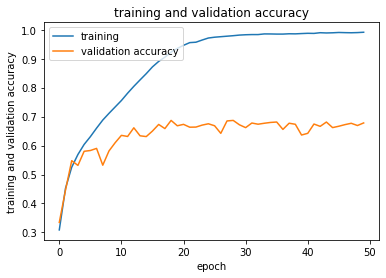

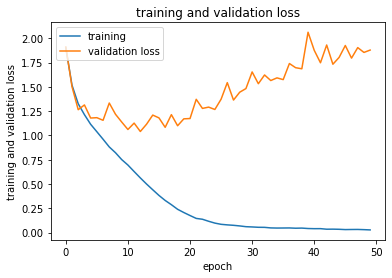

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation accuracy'], loc = 'upper left')
plt.title('training and validation accuracy')
plt.ylabel('training and validation accuracy')
plt.xlabel('epoch')
plt.show()
fig.savefig('train_val_acc_01_01.png')


fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation loss'], loc = 'upper left')
plt.title('training and validation loss')
plt.ylabel('training and validation loss')
plt.xlabel('epoch')
plt.show()
fig.savefig('train_val_loss_01_01.png')

